22:53:06 - cmdstanpy - INFO - Chain [1] start processing
22:53:06 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Kishan teja\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


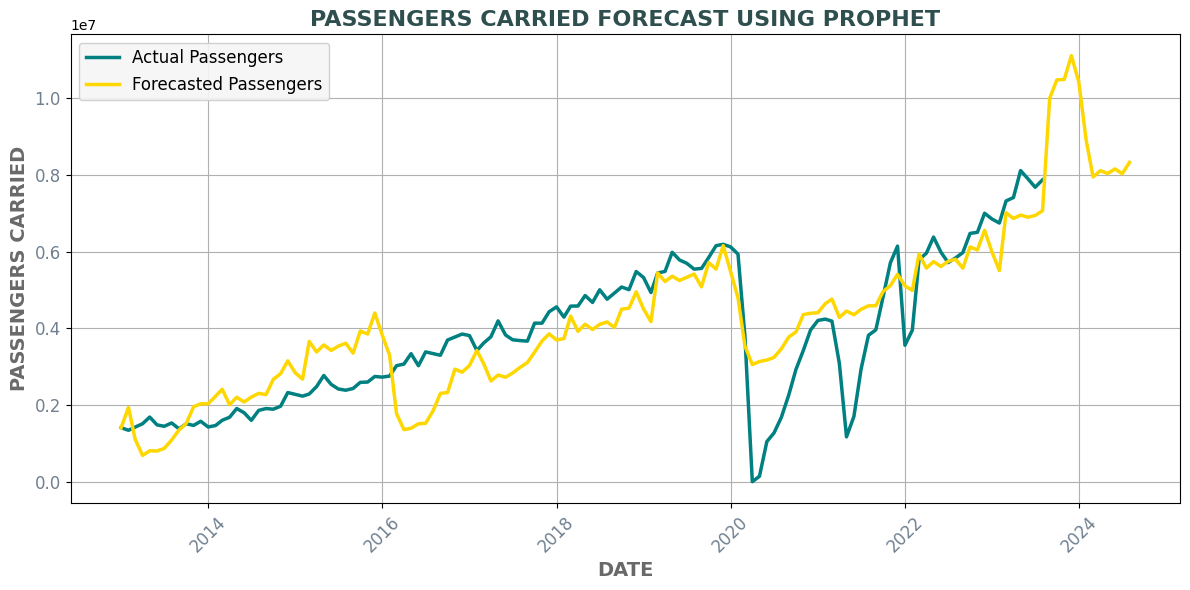

In [6]:
# part - c

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

def load_and_prepare_data(filepath):
    data = pd.read_csv(filepath)
    data.columns = data.columns.str.strip()
    data['MONTH'] = data['MONTH'].str.strip()
    numeric_cols = [
        "TOTAL DEPARTURES", "HOURS FLOWN", "KILOMETRE FLOWN", 
        "PASSENGERS CARRIED", "AVAILABLE SEAT KILOMETRE (IN THOUSAND)", 
        "FREIGHT CARRIED (IN TONNE)", "MAIL CARRIED (IN TONNE)"
    ]
    for col in numeric_cols:
        data[col] = pd.to_numeric(data[col].replace({",": ""}, regex=True), errors='coerce')
    data.fillna(0, inplace=True)
    month_mapping = {
        'JAN': 'Jan', 'FEB': 'Feb', 'MAR': 'Mar', 'APR': 'Apr', 'MAY': 'May', 
        'JUN': 'Jun', 'JUL': 'Jul', 'AUG': 'Aug', 'SEP': 'Sep', 'OCT': 'Oct', 
        'NOV': 'Nov', 'DEC': 'Dec', 'JUNE': 'Jun', 'JULY': 'Jul'
    }
    data['MONTH'] = data['MONTH'].str[:3].str.upper().map(month_mapping)
    data['DATE'] = pd.to_datetime(data['YEAR'].astype(str) + "-" + data['MONTH'], format="%Y-%b")
    data.set_index('DATE', inplace=True)
    data = data.sort_index()
    return data

def prepare_prophet_data(data):
    passenger_series = data[['PASSENGERS CARRIED']].copy()
    passenger_series = passenger_series.rename_axis('ds').reset_index()
    passenger_series = passenger_series.rename(columns={'ds': 'ds', 'PASSENGERS CARRIED': 'y'})
    return passenger_series

def fit_prophet_model(passenger_series):
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.add_seasonality(name='monthly', period=30.44, fourier_order=5)
    model.fit(passenger_series)
    return model

def forecast_passengers(model, periods):
    future = model.make_future_dataframe(periods=periods, freq='M')
    forecast = model.predict(future)
    return forecast

if __name__ == "__main__":
    filepath = "AirtrafficA4.csv"
    data = load_and_prepare_data(filepath)
    passenger_series = prepare_prophet_data(data)
    model = fit_prophet_model(passenger_series)
    nforecasted = 12
    forecast = forecast_passengers(model, nforecasted)
    plt.figure(figsize=(12, 6))
    plt.plot(passenger_series['ds'], passenger_series['y'], label='Actual Passengers', color='teal', linewidth=2.5)
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Passengers', color='gold', linewidth=2.5)
    plt.title('PASSENGERS CARRIED FORECAST USING PROPHET', fontsize=16, fontweight='bold', color='darkslategray')
    plt.xlabel('DATE', fontsize=14, fontweight='bold', color='dimgray')
    plt.ylabel('PASSENGERS CARRIED', fontsize=14, fontweight='bold', color='dimgray')
    plt.xticks(rotation=45, fontsize=12, color='slategray')
    plt.yticks(fontsize=12, color='slategray')
    legend = plt.legend(loc='upper left', fontsize=12)
    frame = legend.get_frame()
    frame.set_facecolor('whitesmoke')
    frame.set_alpha(0.9)
    plt.grid()
    plt.tight_layout()
    plt.savefig('Q2c.png', dpi=300)
    plt.show()
